<a href="https://colab.research.google.com/github/LatiefDataVisionary/multivariate-analysis-college-task/blob/main/src/DiscriminantAnalysis_week12_manually.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Library Importation and Data Loading**

Pada bagian awal ini, dilakukan impor terhadap pustaka-pustaka Python yang dibutuhkan dan pemuatan dataset.

1.  **Impor Pustaka**:
    *   **Pandas**: Digunakan untuk manipulasi data tabular, khususnya untuk membaca file CSV dan bekerja dengan struktur DataFrame.
    *   **NumPy**: Merupakan pustaka fundamental untuk komputasi numerik, menyediakan dukungan untuk operasi array dan matriks yang efisien, yang akan sangat berguna dalam perhitungan manual LDA.
2.  **Pemuatan Dataset**:
    *   Dataset dimuat dari URL yang disediakan (`https://raw.githubusercontent.com/LatiefDataVisionary/multivariate-analysis-college-task/refs/heads/main/datasets/dataset_LDA_2clusters.csv`) menggunakan fungsi `pd.read_csv()` dari Pandas.
    *   Hasil pemuatan data disimpan dalam sebuah DataFrame Pandas yang dinamakan `df`.
3.  **Inspeksi Awal Data**:
    *   `df.head()`: Menampilkan lima baris pertama dari DataFrame untuk mendapatkan gambaran awal mengenai struktur dan isi data.
    *   `df.info()`: Memberikan ringkasan informasi tentang DataFrame, termasuk jumlah entri, tipe data setiap kolom, dan jumlah nilai non-null. Ini berguna untuk memeriksa apakah ada data yang hilang atau tipe data yang tidak sesuai.
    *   `df.shape`: Menampilkan dimensi dari DataFrame (jumlah baris, jumlah kolom).
    *   `df.describe()`: Menampilkan statistik deskriptif dasar untuk kolom-kolom numerik dalam DataFrame, seperti mean, standar deviasi, nilai minimum, maksimum, dan kuartil.

Langkah-langkah ini penting untuk memastikan bahwa data telah dimuat dengan benar dan untuk mendapatkan pemahaman awal tentang dataset sebelum melanjutkan ke tahap analisis dan perhitungan selanjutnya.

### **1.1. Import library yang diperlukan**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **1.2. Pemuatan dataset dari URL**

In [ ]:
data_url = 'https://raw.githubusercontent.com/LatiefDataVisionary/multivariate-analysis-college-task/refs/heads/main/datasets/dataset_LDA_2clusters.csv'

df = pd.read_csv(data_url)

### **1.3. Informasi dataset**

In [ ]:
df.head(10)

,BloodPressure,Age,Cluster
0,72,50,0
1,66,31,1
2,64,32,1
3,66,21,1
4,40,33,1
5,74,30,1
6,50,26,1
7,72,29,1
8,70,53,0
9,96,54,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   BloodPressure  600 non-null    int64
 1   Age            600 non-null    int64
 2   Cluster        600 non-null    int64
dtypes: int64(3)
memory usage: 14.2 KB


In [ ]:
df.shape

(600, 3)

In [ ]:
df.describe()

,BloodPressure,Age,Cluster
count,600.000000,600.000000,600.000000
mean,72.041667,33.278333,0.651667
std,11.980086,11.822315,0.476840
min,24.000000,21.000000,0.000000
25%,64.000000,24.000000,0.000000
50%,72.000000,29.000000,1.000000
75%,80.000000,40.000000,1.000000
max,122.000000,81.000000,1.000000


In [ ]:
# Menghitung jumlah kemunculan setiap nilai di kolom 'Cluster'
counts = df['Cluster'].value_counts()

# Menghitung persentase kemunculan setiap nilai di kolom 'Cluster'
percentages = df['Cluster'].value_counts(normalize=True) * 100

# Menggabungkan kedua hasil ke dalam satu DataFrame
result = pd.DataFrame({'Count': counts, 'Percentage': percentages})

# Membulatkan kolom 'Percentage' hingga 2 angka di belakang koma
result['Percentage'] = result['Percentage'].round(2)

# Menampilkan hasilnya yang sudah dibulatkan
result

,Count,Percentage
Cluster,,
1,391,65.17
0,209,34.83


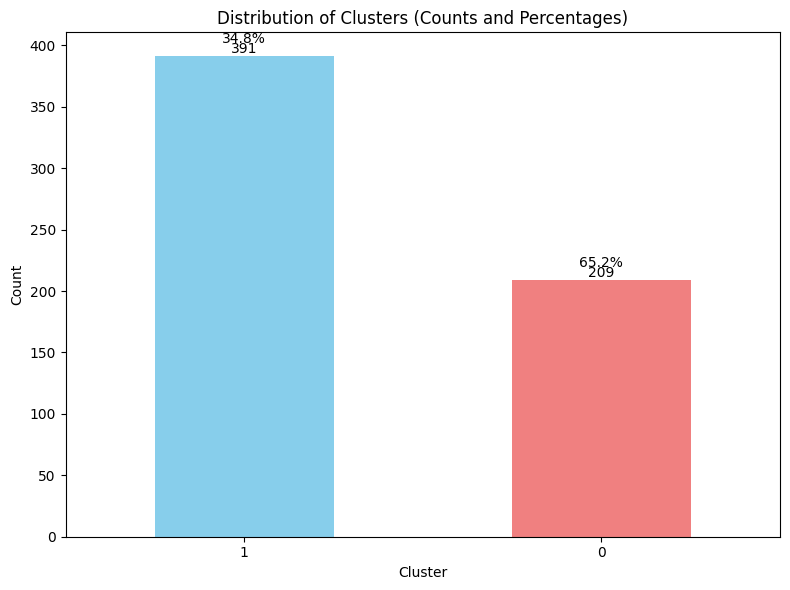

In [ ]:
# Create a figure and an axes for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar plot using the 'Count' column from the 'result' DataFrame
result['Count'].plot(kind='bar', ax=ax, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Set the title and labels for the plot
ax.set_title('Distribution of Clusters (Counts and Percentages)')
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=0) # Ensure x-axis labels are not rotated

# Add text labels for counts and percentages on the bars
for i, count in enumerate(result['Count']):
    percentage = result['Percentage'][i]
    # Add the count label
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
    # Add the percentage label slightly above the count
    ax.text(i, count + (ax.get_ylim()[1] * 0.02), f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()

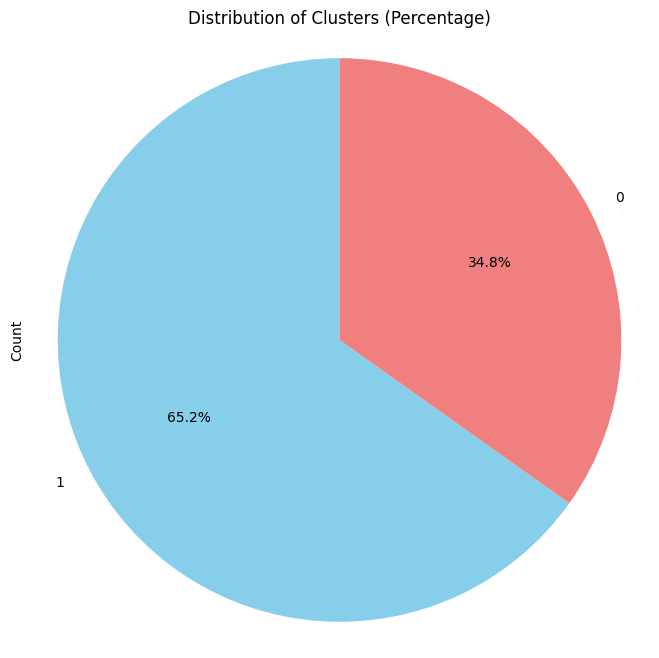

In [ ]:
# Create a figure and an axes for the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Create the pie plot using the 'Count' column from the 'result' DataFrame
# autopct='%1.1f%%' formats the percentage displayed on each slice
result['Count'].plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Set the title for the plot
ax.set_title('Distribution of Clusters (Percentage)')

# Ensure the pie chart is circular
ax.axis('equal')

# Display the plot
plt.show()

## **2. Data Preparation for Manual LDA**

Sebelum memulai perhitungan inti LDA secara manual, data perlu disiapkan. Langkah-langkah utamanya adalah:

1.  **Mengidentifikasi Variabel Fitur (Features) dan Target (Cluster)**:
    *   Variabel fitur adalah kolom-kolom yang akan digunakan sebagai prediktor. Berdasarkan dataset, fitur yang digunakan adalah `BloodPressure` dan `Age`. Variabel-variabel ini akan diekstrak ke dalam sebuah array NumPy atau DataFrame Pandas (`features_X`).
    *   Variabel target adalah kolom yang menunjukkan keanggotaan kelas. Dalam dataset ini, kolom `Cluster` (dengan nilai 0 dan 1) adalah variabel target (`target_y`).
2.  **Memisahkan Data Berdasarkan Kelas**:
    *   Untuk perhitungan matriks sebaran dalam kelas (within-class scatter matrix) dan vektor rata-rata per kelas, data perlu dipisahkan menjadi subset berdasarkan nilai pada kolom target (`Cluster`).
    *   Akan dibuat dua subset data:
        *   `df_class0`: Berisi semua observasi di mana `Cluster` adalah 0.
        *   `df_class1`: Berisi semua observasi di mana `Cluster` adalah 1.
    *   Dari subset ini, akan diekstrak nilai fitur untuk masing-masing kelas (misalnya, `features_X_class0` dan `features_X_class1`).

Persiapan ini akan mempermudah akses ke data yang relevan untuk setiap kelas selama perhitungan matematis LDA berikutnya.


### **2.1. Mengidentifikasi Variabel Fitur dan Target**

In [ ]:
feature_column_names = ['BloodPressure', 'Age']
target_column_name = 'Cluster'

# Ekstrak fitur ke dalam array NumPy untuk kemudahan perhitungan matriks
# Kita akan menggunakan .values untuk mendapatkan array NumPy
features_X = df[feature_column_names].values
target_y = df[target_column_name].values

print(f"Shape of features_X: {features_X.shape}")
print(f"Shape of target_y: {target_y.shape}")
print(f"First 5 rows of features_X:\n{features_X[:5]}")
print(f"First 5 values of target_y:\n{target_y[:5]}")

Shape of features_X: (600, 2)
Shape of target_y: (600,)
First 5 rows of features_X:
[[72 50]
 [66 31]
 [64 32]
 [66 21]
 [40 33]]
First 5 values of target_y:
[0 1 1 1 1]


### **2.2. Memisahkan Data Berdasarkan Kelas**

In [ ]:
# Dapatkan DataFrame dan array fitur untuk masing-masing kelas

# Kelas 0
df_class0 = df[df[target_column_name] == 0]
features_X_class0 = df_class0[feature_column_names].values

# Kelas 1
df_class1 = df[df[target_column_name] == 1]
features_X_class1 = df_class1[feature_column_names].values

print(f"Shape of features_X_class0 (Cluster 0): {features_X_class0.shape}")
print(f"First 5 rows of features_X_class0:\n{features_X_class0[:5]}")
print(f"Number of samples in Class 0: {len(df_class0)}")

print("\n" + "="*50 + "\n")

print(f"Shape of features_X_class1 (Cluster 1): {features_X_class1.shape}")
print(f"First 5 rows of features_X_class1:\n{features_X_class1[:5]}")
print(f"Number of samples in Class 1: {len(df_class1)}")
print("\n" + "="*50 + "\n")

# Verifikasi bahwa total sampel dari kedua kelas sama dengan total sampel di df awal
# Ini juga mengasumsikan tidak ada NaN yang dihapus atau kelas lain yang ada.
# Total baris adalah 600, dan kita memuat 600 baris.
if len(df_class0) + len(df_class1) == len(df):
    print("Data separation by class seems correct. Total samples match.")
else:
    print("Warning: Mismatch in total samples after class separation. Check for other classes or NaN issues if any were handled.")

Shape of features_X_class0 (Cluster 0): (209, 2)
First 5 rows of features_X_class0:
[[72 50]
 [70 53]
 [96 54]
 [92 30]
 [80 57]]
Number of samples in Class 0: 209


Shape of features_X_class1 (Cluster 1): (391, 2)
First 5 rows of features_X_class1:
[[66 31]
 [64 32]
 [66 21]
 [40 33]
 [74 30]]
Number of samples in Class 1: 391


Data separation by class seems correct. Total samples match.


## **Step 1: Calculate Mean Vectors for Each Class (Hitung Vektor Rata-rata untuk Setiap Kelas)**


Langkah pertama dalam perhitungan manual LDA adalah menghitung vektor rata-rata (mean vector) untuk setiap kelas. Vektor rata-rata ini merepresentasikan titik pusat (centroid) dari data untuk masing-masing kelas dalam ruang fitur.

1.  **Definisi Vektor Rata-rata Kelas**:
    *   Untuk sebuah kelas `k` dengan `N_k` sampel dan `d` fitur, vektor rata-rata **m**<sub>`k`</sub> adalah sebuah vektor berdimensi `d` di mana setiap elemennya adalah rata-rata dari fitur yang bersangkutan untuk semua sampel dalam kelas `k`.
    *   Secara matematis, untuk fitur ke-`j` pada kelas `k`:
        (m<sub>k</sub>)<sub>j</sub> = (1/N<sub>k</sub>) * Σ<sub>i=1</sub><sup>N_k</sup> (x<sub>i</sub>)<sub>j</sub>
        di mana (x<sub>i</sub>)<sub>j</sub> adalah nilai fitur ke-`j` dari sampel ke-`i` dalam kelas `k`.
2.  **Perhitungan Menggunakan NumPy**:
    *   Menggunakan data fitur yang telah dipisahkan per kelas (`features_X_class0` dan `features_X_class1`), fungsi `np.mean()` dari NumPy dapat digunakan.
    *   `axis=0` ditentukan dalam `np.mean()` untuk menghitung rata-rata sepanjang kolom (yaitu, untuk setiap fitur secara terpisah).
    *   Hasilnya akan berupa dua vektor:
        *   `mean_vector_class0`: Vektor rata-rata untuk Kelas 0.
        *   `mean_vector_class1`: Vektor rata-rata untuk Kelas 1.
    *   Juga, akan dihitung vektor rata-rata keseluruhan (overall mean vector) dari semua data fitur (`features_X`), yang akan berguna nanti saat menghitung matriks sebaran antar kelas (between-class scatter matrix).

Vektor rata-rata ini adalah komponen penting untuk menghitung matriks sebaran (scatter matrices) pada langkah berikutnya.

### **a. Menghitung vektor rata-rata untuk Kelas 0**

In [ ]:
# features_X_class0 adalah array NumPy dari fitur untuk kelas 0
mean_vector_class0 = np.mean(features_X_class0, axis=0)
print(f"Mean Vector for Class 0 (m₀) (Rata-rata Vektor Kelas 0): \n{mean_vector_class0}")
print(f"  - Rata-rata BloodPressure (Kelas 0): {mean_vector_class0[0]:.4f}")
print(f"  - Rata-rata Age (Kelas 0): {mean_vector_class0[1]:.4f}")

Mean Vector for Class 0 (m₀) (Rata-rata Vektor Kelas 0): 
[80.26794258 45.90909091]
  - Rata-rata BloodPressure (Kelas 0): 80.2679
  - Rata-rata Age (Kelas 0): 45.9091


### **b. Menghitung vektor rata-rata untuk Kelas 1**


In [ ]:
# features_X_class1 adalah array NumPy dari fitur untuk kelas 1
mean_vector_class1 = np.mean(features_X_class1, axis=0)
print(f"Mean Vector for Class 1 (m₁) (Rata-rata Vektor Kelas 1): \n{mean_vector_class1}")
print(f"  - Rata-rata BloodPressure (Kelas 1): {mean_vector_class1[0]:.4f}")
print(f"  - Rata-rata Age (Kelas 1): {mean_vector_class1[1]:.4f}")

Mean Vector for Class 1 (m₁) (Rata-rata Vektor Kelas 1): 
[67.64450128 26.52685422]
  - Rata-rata BloodPressure (Kelas 1): 67.6445
  - Rata-rata Age (Kelas 1): 26.5269


### **c. Menghitung vektor rata-rata keseluruhan (overall mean) untuk semua data**

In [ ]:
# features_X adalah array NumPy dari semua fitur
overall_mean_vector = np.mean(features_X, axis=0)
print(f"Overall Mean Vector (m) (Rata-rata Vektor Keseluruhan): \n{overall_mean_vector}")
print(f"  - Rata-rata BloodPressure (Keseluruhan): {overall_mean_vector[0]:.4f}")
print(f"  - Rata-rata Age (Keseluruhan): {overall_mean_vector[1]:.4f}")

Overall Mean Vector (m) (Rata-rata Vektor Keseluruhan): 
[72.04166667 33.27833333]
  - Rata-rata BloodPressure (Keseluruhan): 72.0417
  - Rata-rata Age (Keseluruhan): 33.2783


## **Step 2: Calculate Scatter Matrices (Hitung Matriks Sebaran)**


Matriks sebaran (scatter matrices) mengukur dispersi data. Ada dua jenis matriks sebaran utama yang perlu dihitung untuk LDA:

1.  **Within-Class Scatter Matrix (S<sub>W</sub>) (Matriks Sebaran Dalam Kelas)**:
    *   S<sub>W</sub> mengukur sebaran (varians) observasi di sekitar rata-rata kelasnya masing-masing. Ini pada dasarnya adalah jumlah dari matriks kovarians individual untuk setiap kelas.
    *   Tujuannya adalah untuk meminimalkan sebaran ini pada sumbu diskriminan.
    *   Untuk setiap kelas `k`, matriks sebaran S<sub>k</sub> dihitung sebagai:
        S<sub>k</sub> = Σ<sub>x ∈ Kelas k</sub> (x - m<sub>k</sub>)(x - m<sub>k</sub>)<sup>T</sup>
        di mana `x` adalah vektor fitur sampel, dan `m_k` adalah vektor rata-rata kelas `k`.
    *   Kemudian, S<sub>W</sub> adalah jumlah dari semua S<sub>k</sub>:
        S<sub>W</sub> = Σ<sub>k</sub> S<sub>k</sub> = S<sub>0</sub> + S<sub>1</sub> (untuk kasus dua kelas).
    *   Dalam praktiknya, seringkali lebih mudah menghitung matriks kovarians untuk setiap kelas (dibagi dengan N<sub>k</sub>-1 atau N<sub>k</sub>) dan kemudian menjumlahkannya (setelah dikalikan dengan N<sub>k</sub>-1 atau N<sub>k</sub>, jika S<sub>k</sub> yang digunakan adalah matriks kovarians yang telah dinormalisasi). Alternatif lain, jika S<sub>k</sub> adalah *sum of squared deviations*, maka langsung dijumlahkan. Untuk konsistensi dengan banyak teks, S<sub>k</sub> sering didefinisikan sebagai (N<sub>k</sub>-1) * Cov<sub>k</sub> atau Σ(x-m<sub>k</sub>)(x-m<sub>k</sub>)<sup>T</sup>.

2.  **Between-Class Scatter Matrix (S<sub>B</sub>) (Matriks Sebaran Antar Kelas)**:
    *   S<sub>B</sub> mengukur sebaran (varians) antar rata-rata kelas relatif terhadap rata-rata keseluruhan data.
    *   Tujuannya adalah untuk memaksimalkan sebaran ini pada sumbu diskriminan, sehingga kelas-kelas menjadi sejauh mungkin terpisah.
    *   Untuk kasus dua kelas (Kelas 0 dan Kelas 1), S<sub>B</sub> dapat dihitung sebagai:
        S<sub>B</sub> = N<sub>0</sub>(m<sub>0</sub> - m)(m<sub>0</sub> - m)<sup>T</sup> + N<sub>1</sub>(m<sub>1</sub> - m)(m<sub>1</sub> - m)<sup>T</sup>
        di mana N<sub>0</sub> dan N<sub>1</sub> adalah jumlah sampel di Kelas 0 dan Kelas 1, m<sub>0</sub> dan m<sub>1</sub> adalah vektor rata-rata Kelas 0 dan Kelas 1, dan `m` adalah vektor rata-rata keseluruhan.
    *   Alternatif untuk dua kelas yang sering digunakan (yang akan kita gunakan karena kesederhanaannya dan menghasilkan arah eigenvector yang sama) adalah:
        S<sub>B</sub> = (m<sub>0</sub> - m<sub>1</sub>)(m<sub>0</sub> - m<sub>1</sub>)<sup>T</sup>
        Perbedaan utamanya adalah pada penskalaan eigenvalue, namun arah eigenvector (yang paling penting untuk sumbu diskriminan) tetap sama. Kita akan menggunakan pendekatan ini untuk S<sub>B</sub> karena kesederhanaan komputasi manualnya, meskipun definisi pertama lebih umum untuk multikelas.

Perhitungan matriks-matriks ini menggunakan operasi vektor dan matriks dari NumPy.


### **2.a. Within-Class Scatter Matrix (S_W) (Matriks Sebaran Dalam Kelas)**

#### **2.a.1. Matriks sebaran untuk Kelas 0 (S_0)**


In [ ]:
# features_X_class0 dan mean_vector_class0 sudah dihitung sebelumnya
scatter_matrix_class0 = np.zeros((features_X.shape[1], features_X.shape[1])) # Inisialisasi matriks nol d x d (d=jumlah fitur)
for row_idx in range(features_X_class0.shape[0]):
    row_vector = features_X_class0[row_idx, :].reshape(features_X.shape[1], 1) # Vektor baris (d x 1)
    mean_vec_c0 = mean_vector_class0.reshape(features_X.shape[1], 1)      # Vektor rata-rata kelas 0 (d x 1)
    scatter_matrix_class0 += (row_vector - mean_vec_c0).dot((row_vector - mean_vec_c0).T)

print(f"Scatter Matrix for Class 0 (S₀) (Matriks Sebaran Kelas 0):\n{scatter_matrix_class0}")

Scatter Matrix for Class 0 (S₀) (Matriks Sebaran Kelas 0):
[[23746.99521531 -6471.90909091]
 [-6471.90909091 22891.27272727]]


#### **2.a.2. Matriks sebaran untuk Kelas 1 (S_1)**


In [ ]:
# features_X_class1 dan mean_vector_class1 sudah dihitung sebelumnya
scatter_matrix_class1 = np.zeros((features_X.shape[1], features_X.shape[1])) # Inisialisasi matriks nol d x d
for row_idx in range(features_X_class1.shape[0]):
    row_vector = features_X_class1[row_idx, :].reshape(features_X.shape[1], 1) # Vektor baris (d x 1)
    mean_vec_c1 = mean_vector_class1.reshape(features_X.shape[1], 1)      # Vektor rata-rata kelas 1 (d x 1)
    scatter_matrix_class1 += (row_vector - mean_vec_c1).dot((row_vector - mean_vec_c1).T)

print(f"Scatter Matrix for Class 1 (S₁) (Matriks Sebaran Kelas 1):\n{scatter_matrix_class1}")

Scatter Matrix for Class 1 (S₁) (Matriks Sebaran Kelas 1):
[[40519.58567775  -722.76726343]
 [ -722.76726343  9663.46803069]]


#### **2.a.3. Within-class scatter matrix S_W**

In [ ]:
S_W = scatter_matrix_class0 + scatter_matrix_class1
print(f"Within-Class Scatter Matrix (S_W) (Matriks Sebaran Dalam Kelas Gabungan):\n{S_W}")

Within-Class Scatter Matrix (S_W) (Matriks Sebaran Dalam Kelas Gabungan):
[[64266.58089306 -7194.67635434]
 [-7194.67635434 32554.74075796]]


### **2.b. Between-Class Scatter Matrix (S_B) (Matriks Sebaran Antar Kelas)**

In [ ]:
# mean_vector_class0 dan mean_vector_class1 sudah dihitung sebelumnya
mean_diff_vector = (mean_vector_class0 - mean_vector_class1).reshape(features_X.shape[1], 1) # (d x 1)
S_B = mean_diff_vector.dot(mean_diff_vector.T)

# Alternatif definisi S_B (lebih umum untuk >2 kelas, dan juga valid untuk 2 kelas):
# N0 = features_X_class0.shape[0]
# N1 = features_X_class1.shape[0]
# overall_mean_vec_reshaped = overall_mean_vector.reshape(features_X.shape[1], 1)
# term0 = N0 * (mean_vector_class0.reshape(features_X.shape[1],1) - overall_mean_vec_reshaped).dot((mean_vector_class0.reshape(features_X.shape[1],1) - overall_mean_vec_reshaped).T)
# term1 = N1 * (mean_vector_class1.reshape(features_X.shape[1],1) - overall_mean_vec_reshaped).dot((mean_vector_class1.reshape(features_X.shape[1],1) - overall_mean_vec_reshaped).T)
# S_B_alternative = term0 + term1
# print(f"Alternative Between-Class Scatter Matrix (S_B_alt):\n{S_B_alternative}")
# Untuk LDA 2 kelas, arah eigenvector akan sama meskipun S_B berbeda skala. Kita gunakan S_B yang lebih sederhana.

print(f"Mean Difference Vector (m₀-m₁) (Vektor Perbedaan Rata-rata):\n{mean_diff_vector.T}") # Transpose untuk tampilan lebih baik
print(f"Between-Class Scatter Matrix (S_B) (Matriks Sebaran Antar Kelas):\n{S_B}")

Mean Difference Vector (m₀-m₁) (Vektor Perbedaan Rata-rata):
[[12.6234413  19.38223669]]
Between-Class Scatter Matrix (S_B) (Matriks Sebaran Antar Kelas):
[[159.35127038 244.6705272 ]
 [244.6705272  375.67109907]]


## **Step 3: Solve the Generalized Eigenvalue Problem (Selesaikan Masalah Eigenvalue Umum)**


Tujuan dari LDA adalah untuk menemukan sebuah proyeksi (sumbu diskriminan) yang memaksimalkan separabilitas antar kelas. Ini secara matematis dapat dirumuskan sebagai pencarian vektor `w` yang memaksimalkan rasio J(w):

J(w) = (w<sup>T</sup>S<sub>B</sub>w) / (w<sup>T</sup>S<sub>W</sub>w)

Solusi untuk `w` dapat ditemukan dengan menyelesaikan masalah eigenvalue umum:
S<sub>B</sub>w = λS<sub>W</sub>w

Jika S<sub>W</sub> bersifat non-singular (dapat diinvers), ini dapat diubah menjadi masalah eigenvalue standar:
S<sub>W</sub><sup>-1</sup>S<sub>B</sub>w = λw

Di sini:
*   `w` adalah eigenvector.
*   `λ` adalah eigenvalue.

Langkah-langkahnya adalah:

1.  **Hitung Invers dari Within-Class Scatter Matrix (S<sub>W</sub><sup>-1</sup>)**:
    *   Menggunakan fungsi `np.linalg.inv()` dari NumPy untuk menghitung matriks invers dari S<sub>W</sub>.
    *   Penting untuk memastikan S<sub>W</sub> tidak singular (determinannya tidak nol). Jika singular, ini bisa menandakan adanya kolinearitas sempurna antar fitur atau jumlah sampel yang lebih sedikit dari jumlah fitur, yang mungkin memerlukan teknik regularisasi atau pemilihan fitur.
2.  **Hitung Matriks Transformasi (S<sub>W</sub><sup>-1</sup>S<sub>B</sub>)**:
    *   Melakukan perkalian matriks antara S<sub>W</sub><sup>-1</sup> dan S<sub>B</sub>.
3.  **Hitung Eigenvalue dan Eigenvector**:
    *   Menggunakan fungsi `np.linalg.eig()` dari NumPy pada matriks S<sub>W</sub><sup>-1</sup>S<sub>B</sub>. Fungsi ini mengembalikan dua array: satu berisi eigenvalue dan satu lagi berisi eigenvector yang bersesuaian (sebagai kolom-kolom matriks).
4.  **Pilih Eigenvector yang Relevan**:
    *   Untuk LDA dengan `C` kelas, akan ada paling banyak `C-1` eigenvector yang tidak nol (atau eigenvalue yang tidak nol jika menggunakan definisi S<sub>B</sub> yang bergantung pada rata-rata keseluruhan). Dalam kasus klasifikasi biner (C=2), akan ada satu eigenvector yang paling signifikan yang sesuai dengan eigenvalue terbesar. Eigenvector ini, `w`, mendefinisikan arah sumbu diskriminan linier.
    *   Eigenvector akan diurutkan berdasarkan eigenvalue-nya dari yang terbesar ke yang terkecil. Kita akan memilih eigenvector yang memiliki eigenvalue terbesar.

Eigenvector `w` yang dipilih ini adalah vektor koefisien yang akan digunakan untuk memproyeksikan data ke sumbu diskriminan.


In [ ]:
# 1. Hitung Invers dari Within-Class Scatter Matrix (S_W⁻¹)
# S_W sudah dihitung pada langkah sebelumnya
try:
    S_W_inv = np.linalg.inv(S_W)
    print(f"Inverse of Within-Class Scatter Matrix (S_W⁻¹) (Invers Matriks Sebaran Dalam Kelas):\n{S_W_inv}")
except np.linalg.LinAlgError:
    print("Error: Within-Class Scatter Matrix (S_W) is singular and cannot be inverted.")
    print("This might be due to perfect multicollinearity or n_samples < n_features within classes.")
    print("Consider adding a small identity matrix (regularization) or re-evaluating features.")
    # Contoh regularisasi (jika diperlukan dan S_W_inv tidak dapat dihitung):
    # epsilon = 1e-6 # Nilai regularisasi kecil
    # S_W_reg = S_W + np.eye(S_W.shape[0]) * epsilon
    # S_W_inv = np.linalg.inv(S_W_reg)
    # print(f"\nInverse of Regularized Within-Class Scatter Matrix (S_W_reg⁻¹):\n{S_W_inv}")
    S_W_inv = None # Atau tangani error sesuai kebutuhan

if S_W_inv is not None:
    print("\n" + "="*50 + "\n")

    # 2. Hitung Matriks Transformasi (S_W⁻¹ * S_B)
    # S_B sudah dihitung pada langkah sebelumnya
    matrix_for_eigen_decomposition = S_W_inv.dot(S_B)
    print(f"Matrix for Eigen Decomposition (S_W⁻¹ * S_B) (Matriks untuk Dekomposisi Eigen):\n{matrix_for_eigen_decomposition}")
    print("\n" + "="*50 + "\n")

    # 3. Hitung Eigenvalue dan Eigenvector
    # eigenvalues adalah array 1D dari eigenvalue
    # eigenvectors adalah matriks di mana setiap kolom adalah eigenvector yang bersesuaian dengan eigenvalue
    eigenvalues, eigenvectors = np.linalg.eig(matrix_for_eigen_decomposition)

    print(f"Eigenvalues (λ) (Nilai Eigen):\n{eigenvalues}")
    print(f"Eigenvectors (v) (Vektor Eigen) (kolom adalah vektor eigen):\n{eigenvectors}")
    print("\n" + "="*50 + "\n")

    # 4. Pilih Eigenvector yang Relevan (w)
    # Eigenvector yang bersesuaian dengan eigenvalue terbesar akan menjadi sumbu diskriminan.
    # Untuk kasus 2 kelas, akan ada 1 eigenvalue non-nol yang signifikan (atau C-1 jika C>2).
    # Pasangkan eigenvalue dengan eigenvector-nya
    eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]

    # Urutkan pasangan (eigenvalue, eigenvector) berdasarkan eigenvalue secara menurun
    eigen_pairs.sort(key=lambda k: k[0], reverse=True)

    print("Eigenvalue-Eigenvector pairs, sorted by eigenvalue (descending):")
    for i, pair in enumerate(eigen_pairs):
        print(f"Pair {i+1}: Eigenvalue = {pair[0]:.4e}, Eigenvector = {pair[1].T}") # .T untuk tampilan baris
    print("\n" + "="*50 + "\n")

    # Pilih eigenvector (w) yang sesuai dengan eigenvalue terbesar.
    # Untuk klasifikasi biner, kita hanya membutuhkan satu eigenvector.
    W_vector = eigen_pairs[0][1].reshape(features_X.shape[1], 1) # Ambil eigenvector pertama (nilai eigen terbesar) dan reshape
    print(f"Selected Discriminant Vector (w) (Vektor Diskriminan Terpilih):\n{W_vector.T}") # .T untuk tampilan baris
    print("\n" + "="*50 + "\n")

    print("Step 3: Solving generalized eigenvalue problem completed.")
else:
    print("Step 3 could not be completed due to singular S_W.")

Inverse of Within-Class Scatter Matrix (S_W⁻¹) (Invers Matriks Sebaran Dalam Kelas):
[[1.59549330e-05 3.52607875e-06]
 [3.52607875e-06 3.14967643e-05]]


Matrix for Eigen Decomposition (S_W⁻¹ * S_B) (Matriks untuk Dekomposisi Eigen):
[[0.00340517 0.00522835]
 [0.00826822 0.01269515]]


Eigenvalues (λ) (Nilai Eigen):
[0.         0.01610032]
Eigenvectors (v) (Vektor Eigen) (kolom adalah vektor eigen):
[[-0.83794965 -0.38080787]
 [ 0.54574755 -0.92465419]]


Eigenvalue-Eigenvector pairs, sorted by eigenvalue (descending):
Pair 1: Eigenvalue = 1.6100e-02, Eigenvector = [-0.38080787 -0.92465419]
Pair 2: Eigenvalue = 0.0000e+00, Eigenvector = [-0.83794965  0.54574755]


Selected Discriminant Vector (w) (Vektor Diskriminan Terpilih):
[[-0.38080787 -0.92465419]]


Step 3: Solving generalized eigenvalue problem completed.


## **Step 4: Project Data onto the Discriminant Axis (LD Scores) (Proyeksikan Data ke Sumbu Diskriminan (Skor LD))**


Setelah vektor diskriminan `W_vector` (eigenvector yang sesuai dengan eigenvalue terbesar dari S<sub>W</sub><sup>-1</sup>S<sub>B</sub>) ditentukan, langkah berikutnya adalah memproyeksikan data fitur asli ke sumbu baru yang didefinisikan oleh `W_vector`. Proyeksi ini mengubah data asli yang mungkin berdimensi tinggi (dalam kasus ini, 2D) menjadi data berdimensi lebih rendah (dalam kasus klasifikasi biner, menjadi 1D) yang memaksimalkan pemisahan antar kelas.

1.  **Rumus Proyeksi**:
    *   Untuk setiap sampel data `x` (vektor fitur `d x 1`), skor diskriminan linier (LD Score), `z`, dihitung sebagai:
        `z = W_vector`<sup>T</sup>`x`
    *   Ini adalah perkalian dot antara transpose dari vektor diskriminan (`1 x d`) dan vektor fitur sampel (`d x 1`), yang menghasilkan skalar (nilai 1D).
2.  **Penerapan pada Seluruh Dataset**:
    *   Operasi proyeksi ini diterapkan pada seluruh dataset fitur (`features_X`). Jika `features_X` adalah matriks `N x d` (N sampel, d fitur) dan `W_vector` adalah `d x 1`, maka `features_X.dot(W_vector)` akan menghasilkan matriks `N x 1`, yang berisi skor LD untuk setiap sampel.
    *   Skor LD ini dapat disimpan dalam kolom baru di DataFrame asli atau sebagai array NumPy terpisah.
    *   Skor LD ini akan digunakan untuk menentukan batas keputusan (threshold) dan untuk melakukan klasifikasi.

Setelah langkah ini, setiap observasi data akan memiliki satu skor numerik yang merepresentasikan posisinya pada sumbu diskriminan linier. Idealnya, skor LD untuk kelas yang berbeda akan terkelompok secara terpisah pada sumbu ini.


Shape of LD Scores array (Skor LD): (600, 1)
First 10 LD Scores (Skor LD pertama):
[-73.65087604 -53.79759926 -53.96063771 -44.55105739 -45.745903
 -55.91940804 -43.0814024  -54.23313811 -75.66322286 -86.48888169]


DataFrame with LD_Score_Manual added:
   BloodPressure  Age  Cluster  LD_Score_Manual
0             72   50        0       -73.650876
1             66   31        1       -53.797599
2             64   32        1       -53.960638
3             66   21        1       -44.551057
4             40   33        1       -45.745903




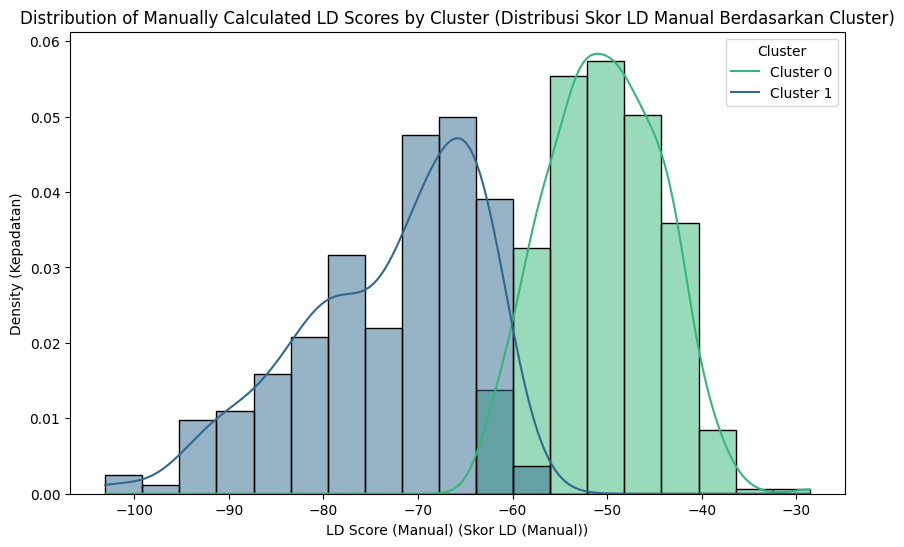

In [ ]:
# W_vector didapatkan dari langkah sebelumnya (eigenvector yang sesuai dengan eigenvalue terbesar)
# features_X adalah array NumPy dari semua fitur (N x d)
# W_vector adalah array NumPy (d x 1)

# Pastikan W_vector telah dihitung pada langkah sebelumnya
if 'W_vector' in globals() and W_vector is not None:
    # Lakukan proyeksi data: features_X (N x d) dikalikan dengan W_vector (d x 1)
    # Hasilnya adalah ld_scores (N x 1)
    ld_scores = features_X.dot(W_vector)

    # Untuk kemudahan analisis dan visualisasi, tambahkan ld_scores ke DataFrame df
    df['LD_Score_Manual'] = ld_scores.flatten() # flatten() untuk mengubah array (N,1) menjadi (N,)

    print(f"Shape of LD Scores array (Skor LD): {ld_scores.shape}")
    print(f"First 10 LD Scores (Skor LD pertama):\n{ld_scores[:10].flatten()}") # Tampilkan 10 skor pertama
    print("\n" + "="*50 + "\n")

    print("DataFrame with LD_Score_Manual added:")
    print(df.head())
    print("\n" + "="*50 + "\n")

    # Visualisasi distribusi LD Scores berdasarkan kelas (opsional, tapi sangat membantu)
    # Ini mirip dengan yang dilakukan pada evaluasi model scikit-learn,
    # tapi kali ini menggunakan skor yang dihitung manual.
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='LD_Score_Manual', hue=target_column_name, kde=True, palette='viridis', stat="density", common_norm=False)
    plt.title('Distribution of Manually Calculated LD Scores by Cluster (Distribusi Skor LD Manual Berdasarkan Cluster)')
    plt.xlabel('LD Score (Manual) (Skor LD (Manual))')
    plt.ylabel('Density (Kepadatan)')
    plt.legend(title=target_column_name, labels=[f'Cluster {val}' for val in sorted(df[target_column_name].unique())])
    plt.show()

else:
    print("W_vector is not defined. Please ensure Step 3 was completed successfully.")

## **Step 5: Determine a Threshold for Classification (Tentukan Ambang Batas untuk Klasifikasi)**

Setelah mendapatkan skor diskriminan linier (LD Scores) untuk setiap observasi, sebuah nilai ambang batas (threshold atau cut-off value) perlu ditentukan. Threshold ini akan digunakan untuk mengklasifikasikan observasi ke dalam salah satu dari dua kelas berdasarkan skor LD-nya.

1.  **Menghitung Rata-rata Skor LD (Centroid) per Kelas pada Sumbu Diskriminan**:
    *   Pertama, skor LD yang telah dihitung pada langkah sebelumnya (`df['LD_Score_Manual']`) dipisahkan berdasarkan kelas aslinya (`Cluster` 0 dan `Cluster` 1).
    *   Kemudian, rata-rata dari skor LD dihitung untuk setiap kelas. Rata-rata ini adalah proyeksi dari vektor rata-rata kelas (m<sub>0</sub> dan m<sub>1</sub>) ke sumbu diskriminan `W_vector`.
        *   `ld_mean_class0`: Rata-rata skor LD untuk Kelas 0.
        *   `ld_mean_class1`: Rata-rata skor LD untuk Kelas 1.
    *   Titik-titik ini dapat dianggap sebagai pusat (centroid) dari masing-masing kelas pada sumbu diskriminan 1D.

2.  **Menentukan Threshold**:
    *   Cara paling sederhana dan umum untuk menentukan threshold (jika tidak ada informasi prior probability yang berbeda atau biaya misklasifikasi yang tidak sama) adalah dengan mengambil titik tengah antara dua centroid kelas pada sumbu diskriminan.
    *   Threshold = (ld_mean_class0 + ld_mean_class1) / 2
    *   Observasi dengan skor LD di satu sisi threshold akan diklasifikasikan sebagai Kelas 0, dan yang di sisi lain sebagai Kelas 1. Keputusan sisi mana yang menjadi Kelas 0 atau Kelas 1 akan bergantung pada nilai relatif `ld_mean_class0` dan `ld_mean_class1` serta bagaimana `W_vector` diorientasikan (misalnya, apakah nilai LD yang lebih tinggi cenderung ke Kelas 1 atau Kelas 0).

Threshold ini adalah nilai kunci yang akan digunakan pada langkah klasifikasi berikutnya.


Mean LD Score for Class 0 (Centroid Kelas 0 pada Sumbu LD): -73.0167
Mean LD Score for Class 1 (Centroid Kelas 1 pada Sumbu LD): -50.2877


Calculated Classification Threshold (Ambang Batas Klasifikasi Terhitung): -61.6522




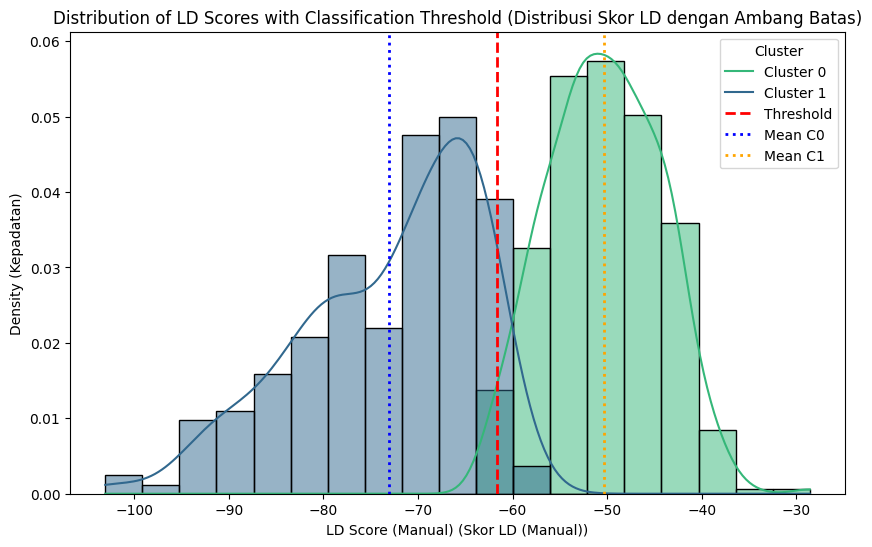

In [ ]:
# Pastikan kolom 'LD_Score_Manual' ada di DataFrame df dari langkah sebelumnya
if 'LD_Score_Manual' in df.columns:
    # 1. Menghitung Rata-rata Skor LD (Centroid) per Kelas
    # df_class0 dan df_class1 sudah dibuat pada langkah persiapan data,
    # kita bisa menggunakannya atau memfilter df yang sudah memiliki LD_Score_Manual

    # Ambil skor LD untuk masing-masing kelas dari DataFrame 'df' yang sudah diupdate
    ld_scores_class0 = df[df[target_column_name] == 0]['LD_Score_Manual']
    ld_scores_class1 = df[df[target_column_name] == 1]['LD_Score_Manual']

    # Hitung rata-rata skor LD untuk setiap kelas
    ld_mean_class0 = np.mean(ld_scores_class0)
    ld_mean_class1 = np.mean(ld_scores_class1)

    print(f"Mean LD Score for Class 0 (Centroid Kelas 0 pada Sumbu LD): {ld_mean_class0:.4f}")
    print(f"Mean LD Score for Class 1 (Centroid Kelas 1 pada Sumbu LD): {ld_mean_class1:.4f}")
    print("\n" + "="*50 + "\n")

    # 2. Menentukan Threshold
    # Threshold adalah titik tengah antara dua centroid kelas
    classification_threshold = (ld_mean_class0 + ld_mean_class1) / 2
    print(f"Calculated Classification Threshold (Ambang Batas Klasifikasi Terhitung): {classification_threshold:.4f}")
    print("\n" + "="*50 + "\n")

    # Menampilkan kembali visualisasi distribusi LD Scores dengan threshold
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='LD_Score_Manual', hue=target_column_name, kde=True, palette='viridis', stat="density", common_norm=False)
    plt.title('Distribution of LD Scores with Classification Threshold (Distribusi Skor LD dengan Ambang Batas)')
    plt.xlabel('LD Score (Manual) (Skor LD (Manual))')
    plt.ylabel('Density (Kepadatan)')
    plt.axvline(classification_threshold, color='red', linestyle='--', lw=2, label=f'Threshold ({classification_threshold:.2f})')
    plt.axvline(ld_mean_class0, color='blue', linestyle=':', lw=2, label=f'Mean C0 ({ld_mean_class0:.2f})')
    plt.axvline(ld_mean_class1, color='orange', linestyle=':', lw=2, label=f'Mean C1 ({ld_mean_class1:.2f})')
    plt.legend(title=target_column_name, labels=[f'Cluster {val}' for val in sorted(df[target_column_name].unique())] + ['Threshold', 'Mean C0', 'Mean C1'])
    plt.show()

else:
    print("'LD_Score_Manual' column not found in DataFrame. Please ensure Step 4 was completed successfully.")

## **Step 6: Formulate the Discriminant Function and Classify Data (Rumuskan Fungsi Diskriminan dan Klasifikasikan Data)**


Dengan vektor diskriminan `W_vector` dan threshold klasifikasi yang telah ditentukan, kita sekarang dapat merumuskan fungsi diskriminan dan menggunakannya untuk mengklasifikasikan data.

1.  **Merumuskan Fungsi Diskriminan Linier (Bentuk Skor LD)**:
    *   Fungsi diskriminan yang menghasilkan skor LD (`z`) untuk suatu sampel `x = [BloodPressure, Age]`<sup>T</sup> diberikan oleh:
        `z = W_vector`<sup>T</sup>`x = w₁*BloodPressure + w₂*Age`
        Di mana `w₁` dan `w₂` adalah komponen dari `W_vector`.
    *   Penting diingat bahwa ini adalah skor mentah. Klasifikasi terjadi dengan membandingkan skor ini dengan `classification_threshold`.

2.  **Aturan Klasifikasi**:
    *   Sebuah sampel akan diklasifikasikan ke salah satu kelas berdasarkan perbandingan skor LD-nya (`df['LD_Score_Manual']`) dengan `classification_threshold`.
    *   Perlu ditentukan kelas mana yang diasosiasikan dengan skor LD yang lebih tinggi dan mana yang lebih rendah. Ini tergantung pada orientasi `W_vector` dan nilai `ld_mean_class0` serta `ld_mean_class1`.
    *   Misalnya, jika `ld_mean_class1 > ld_mean_class0`:
        *   Jika `LD_Score > classification_threshold`, maka prediksi Kelas 1.
        *   Jika `LD_Score <= classification_threshold`, maka prediksi Kelas 0.
    *   Sebaliknya, jika `ld_mean_class0 > ld_mean_class1`:
        *   Jika `LD_Score > classification_threshold`, maka prediksi Kelas 0.
        *   Jika `LD_Score <= classification_threshold`, maka prediksi Kelas 1.
    *   Aturan ini akan diterapkan untuk membuat kolom prediksi baru di DataFrame.

3.  **Menghitung Akurasi Klasifikasi Manual (Opsional)**:
    *   Setelah prediksi dibuat untuk seluruh dataset berdasarkan aturan manual, akurasi klasifikasi dapat dihitung dengan membandingkan prediksi manual dengan label kelas asli (`target_y`).
    *   Akurasi = (Jumlah Prediksi Benar) / (Total Jumlah Sampel)

Merumuskan fungsi secara eksplisit membantu pemahaman, dan klasifikasi ulang memberikan ukuran seberapa baik metode manual ini bekerja pada data yang sama yang digunakan untuk membangunnya (ini adalah akurasi pada "data pelatihan" untuk metode manual ini, bukan evaluasi generalisasi yang sebenarnya).

Linear Discriminant Function (LD Score Form) (Fungsi Diskriminan Linier (Bentuk Skor LD)):
LD_Score = (-0.3808 * BloodPressure) + (-0.9247 * Age)
Catatan: 'BloodPressure' dan 'Age' adalah nilai fitur asli, bukan yang diskalakan, karena W_vector berasal dari S_W dan S_B data asli.


Mean LD Score Class 0: -73.0167
Mean LD Score Class 1: -50.2877
Classification Threshold: -61.6522
Class associated with scores > threshold will be: Cluster 1
Class associated with scores <= threshold will be: Cluster 0


DataFrame with Manual Predictions (DataFrame dengan Prediksi Manual):
   Cluster  LD_Score_Manual  Predicted_Cluster_Manual
0        0       -73.650876                         0
1        1       -53.797599                         1
2        1       -53.960638                         1
3        1       -44.551057                         1
4        1       -45.745903                         1
5        1       -55.919408                         1
6        1       -43.081402                    

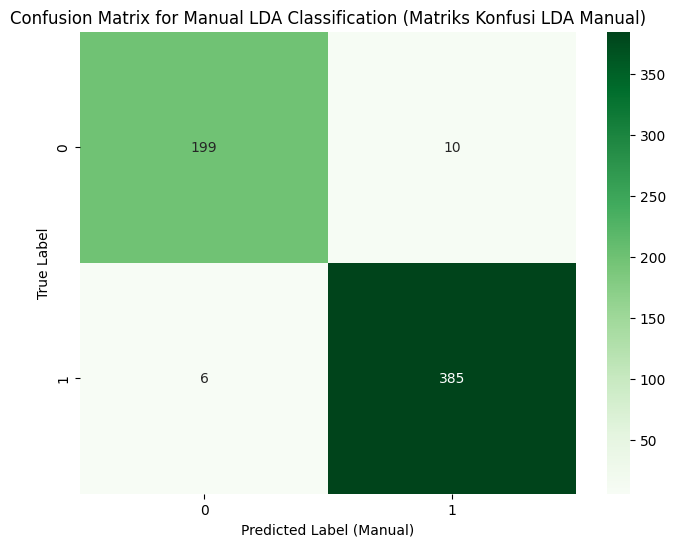



Alternative Discriminant Function (D) (Fungsi Diskriminan Alternatif D):
D = (-0.3808 * BloodPressure) + (-0.9247 * Age) - (-61.6522)
Jika D > 0, prediksi Cluster 1.
Jika D <= 0, prediksi Cluster 0.


Step 6: Formulation of discriminant function and classification completed.


In [ ]:
# Pastikan variabel-variabel dari langkah sebelumnya tersedia:
# W_vector, classification_threshold, df (dengan 'LD_Score_Manual'),
# target_column_name, ld_mean_class0, ld_mean_class1

if 'W_vector' in globals() and W_vector is not None and \
   'classification_threshold' in globals() and \
   'df' in globals() and 'LD_Score_Manual' in df.columns and \
   'ld_mean_class0' in globals() and 'ld_mean_class1' in globals():

    w1 = W_vector[0, 0] # Koefisien untuk BloodPressure
    w2 = W_vector[1, 0] # Koefisien untuk Age

    # 1. Merumuskan Fungsi Diskriminan Linier (Bentuk Skor LD)
    print("Linear Discriminant Function (LD Score Form) (Fungsi Diskriminan Linier (Bentuk Skor LD)):")
    print(f"LD_Score = ({w1:.4f} * BloodPressure) + ({w2:.4f} * Age)")
    print("Catatan: 'BloodPressure' dan 'Age' adalah nilai fitur asli, bukan yang diskalakan, karena W_vector berasal dari S_W dan S_B data asli.")
    print("\n" + "="*50 + "\n")

    # 2. Aturan Klasifikasi dan Membuat Prediksi Manual
    # Tentukan kelas mana yang memiliki rata-rata LD Score lebih tinggi
    # Ini akan menjadi kelas "positif" jika skor LD di atas threshold
    predicted_class_manual = []

    # Menentukan kelas mana yang memiliki nilai LD score lebih tinggi secara rata-rata
    # Ini membantu menentukan logika > atau <= threshold
    class_for_higher_score = 1 if ld_mean_class1 > ld_mean_class0 else 0
    class_for_lower_score = 0 if ld_mean_class1 > ld_mean_class0 else 1

    print(f"Mean LD Score Class 0: {ld_mean_class0:.4f}")
    print(f"Mean LD Score Class 1: {ld_mean_class1:.4f}")
    print(f"Classification Threshold: {classification_threshold:.4f}")
    print(f"Class associated with scores > threshold will be: Cluster {class_for_higher_score}")
    print(f"Class associated with scores <= threshold will be: Cluster {class_for_lower_score}")
    print("\n" + "="*50 + "\n")

    for score in df['LD_Score_Manual']:
        if score > classification_threshold:
            predicted_class_manual.append(class_for_higher_score)
        else:
            predicted_class_manual.append(class_for_lower_score)

    df['Predicted_Cluster_Manual'] = predicted_class_manual

    print("DataFrame with Manual Predictions (DataFrame dengan Prediksi Manual):")
    print(df[[target_column_name, 'LD_Score_Manual', 'Predicted_Cluster_Manual']].head(10))
    print("\n" + "="*50 + "\n")

    # 3. Menghitung Akurasi Klasifikasi Manual
    actual_labels = df[target_column_name].values
    manual_predictions = df['Predicted_Cluster_Manual'].values

    correct_predictions = np.sum(actual_labels == manual_predictions)
    total_samples = len(actual_labels)
    manual_accuracy = correct_predictions / total_samples

    print(f"Accuracy of Manual LDA Classification (Akurasi Klasifikasi LDA Manual): {manual_accuracy:.4f}")
    print(f"Accuracy in percentage: {manual_accuracy*100:.2f}%")
    print(f"Number of correct predictions: {correct_predictions} out of {total_samples} samples.")
    print("\n" + "="*50 + "\n")

    # (Opsional) Menampilkan Confusion Matrix untuk prediksi manual
    from sklearn.metrics import confusion_matrix as sk_confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    conf_matrix_manual = sk_confusion_matrix(actual_labels, manual_predictions)
    print("Manual Classification Confusion Matrix (Matriks Konfusi Klasifikasi Manual):")
    print(conf_matrix_manual)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_manual, annot=True, fmt='d', cmap='Greens',
                xticklabels=sorted(df[target_column_name].unique()),
                yticklabels=sorted(df[target_column_name].unique()))
    plt.xlabel('Predicted Label (Manual)')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for Manual LDA Classification (Matriks Konfusi LDA Manual)')
    plt.show()
    print("\n" + "="*50 + "\n")


    # Merumuskan Fungsi Diskriminan dalam bentuk D = w1*X1 + w2*X2 - C (threshold diserap jadi konstanta)
    # D > 0 -> class_for_higher_score ; D <= 0 -> class_for_lower_score
    # Ini ekuivalen dengan LD_Score - threshold > 0
    constant_c = classification_threshold
    print("Alternative Discriminant Function (D) (Fungsi Diskriminan Alternatif D):")
    print(f"D = ({w1:.4f} * BloodPressure) + ({w2:.4f} * Age) - ({constant_c:.4f})")
    print(f"Jika D > 0, prediksi Cluster {class_for_higher_score}.")
    print(f"Jika D <= 0, prediksi Cluster {class_for_lower_score}.")
    print("\n" + "="*50 + "\n")


    print("Step 6: Formulation of discriminant function and classification completed.")

else:
    print("Required variables (W_vector, classification_threshold, df with 'LD_Score_Manual', ld_mean_class0, ld_mean_class1) not found.")
    print("Please ensure Steps 1-5 were completed successfully.")

## **Step 7: Reviewing the Formulated Manual Discriminant Function (Meninjau Rumus Fungsi Diskriminan Manual yang Telah Dirumuskan)**

Sebelum melanjutkan untuk membuat prediksi pada data baru, penting untuk meninjau kembali bentuk eksplisit dari fungsi diskriminan linier yang telah berhasil dibangun melalui perhitungan manual. Fungsi ini akan menjadi dasar untuk semua klasifikasi manual selanjutnya.

Ada dua cara umum untuk menyajikan fungsi diskriminan:

1.  **Bentuk Skor LD dengan Threshold Terpisah**:
    *   Hitung Skor Diskriminan Linier (LD Score):
        `LD_Score = w₁ * BloodPressure + w₂ * Age`
    *   Kemudian, bandingkan `LD_Score` dengan `classification_threshold`:
        *   Jika `LD_Score > classification_threshold`, prediksi `class_for_higher_score`.
        *   Jika `LD_Score <= classification_threshold`, prediksi `class_for_lower_score`.

2.  **Bentuk Fungsi Diskriminan D (Threshold Terintegrasi)**:
    *   Definisikan fungsi D sebagai:
        `D = w₁ * BloodPressure + w₂ * Age - classification_threshold`
        atau dapat ditulis juga sebagai:
        `D = LD_Score - classification_threshold`
    *   Kemudian, aturan klasifikasi menjadi:
        *   Jika `D > 0`, prediksi `class_for_higher_score`.
        *   Jika `D <= 0`, prediksi `class_for_lower_score`.

Kedua bentuk ini ekuivalen dan menghasilkan keputusan klasifikasi yang sama. `w₁` dan `w₂` adalah koefisien (komponen dari `W_vector`) yang ditemukan pada Step 3, dan `classification_threshold` ditentukan pada Step 5. Variabel `class_for_higher_score` dan `class_for_lower_score` ditentukan pada Step 6.

Mengingat kembali rumus ini memastikan bahwa kita menggunakan dasar yang benar untuk prediksi pada data baru.

In [ ]:
# Pastikan variabel dari langkah-langkah sebelumnya tersedia:
# W_vector, classification_threshold, class_for_higher_score, class_for_lower_score

if 'W_vector' in globals() and W_vector is not None and \
   'classification_threshold' in globals() and \
   'class_for_higher_score' in globals() and 'class_for_lower_score' in globals():

    w1_manual_review = W_vector[0, 0]
    w2_manual_review = W_vector[1, 0]
    threshold_review = classification_threshold
    class_high_review = class_for_higher_score
    class_low_review = class_for_lower_score

    print("--- Review of Manual Discriminant Function ---")
    print("(Tinjauan Rumus Fungsi Diskriminan Manual)\n")

    print("Bentuk 1: Skor LD dengan Threshold Terpisah")
    print("-------------------------------------------")
    print(f"1. Hitung Skor LD (LD_Score):")
    print(f"   LD_Score = ({w1_manual_review:.4f} * BloodPressure) + ({w2_manual_review:.4f} * Age)")
    print(f"\n2. Bandingkan LD_Score dengan Classification Threshold = {threshold_review:.4f}:")
    print(f"   - Jika LD_Score > {threshold_review:.4f}, maka prediksi Cluster {class_high_review}")
    print(f"   - Jika LD_Score <= {threshold_review:.4f}, maka prediksi Cluster {class_low_review}")
    print("\n" + "="*60 + "\n")

    print("Bentuk 2: Fungsi Diskriminan D (Threshold Terintegrasi)")
    print("-------------------------------------------------------")
    print(f"1. Hitung Fungsi Diskriminan D:")
    # D = LD_Score - threshold
    print(f"   D = ({w1_manual_review:.4f} * BloodPressure) + ({w2_manual_review:.4f} * Age) - ({threshold_review:.4f})")
    print(f"\n2. Bandingkan D dengan 0:")
    print(f"   - Jika D > 0, maka prediksi Cluster {class_high_review}")
    print(f"   - Jika D <= 0, maka prediksi Cluster {class_low_review}")
    print("\n" + "="*60 + "\n")

    print("Step 6.1: Review of manual discriminant function completed.")

else:
    print("Required variables (W_vector, classification_threshold, etc.) not found.")
    print("Please ensure previous steps (Manual LDA up to Step 6) were completed successfully.")

--- Review of Manual Discriminant Function ---
(Tinjauan Rumus Fungsi Diskriminan Manual)

Bentuk 1: Skor LD dengan Threshold Terpisah
-------------------------------------------
1. Hitung Skor LD (LD_Score):
   LD_Score = (-0.3808 * BloodPressure) + (-0.9247 * Age)

2. Bandingkan LD_Score dengan Classification Threshold = -61.6522:
   - Jika LD_Score > -61.6522, maka prediksi Cluster 1
   - Jika LD_Score <= -61.6522, maka prediksi Cluster 0


Bentuk 2: Fungsi Diskriminan D (Threshold Terintegrasi)
-------------------------------------------------------
1. Hitung Fungsi Diskriminan D:
   D = (-0.3808 * BloodPressure) + (-0.9247 * Age) - (-61.6522)

2. Bandingkan D dengan 0:
   - Jika D > 0, maka prediksi Cluster 1
   - Jika D <= 0, maka prediksi Cluster 0


Step 6.1: Review of manual discriminant function completed.


## **Step 8: Making Predictions on New Data (Manual) (Membuat Prediksi pada Data Baru (Manual))**


Setelah fungsi diskriminan manual dan threshold klasifikasi ditentukan, model ini dapat digunakan untuk membuat prediksi pada data baru (unseen data).

1.  **Menyiapkan Data Baru**:
    *   Data baru harus memiliki struktur kolom fitur yang sama dengan data yang digunakan untuk membangun fungsi diskriminan (yaitu, `BloodPressure` dan `Age`).
    *   Data baru akan dibuat sebagai DataFrame Pandas.
2.  **Menghitung Skor LD untuk Data Baru**:
    *   Untuk setiap sampel dalam data baru, skor LD (`z_new`) dihitung menggunakan fungsi diskriminan yang telah dirumuskan pada Langkah 6:
        `z_new = w₁ * BloodPressure_new + w₂ * Age_new`
        di mana `w₁` dan `w₂` adalah komponen dari `W_vector`.
3.  **Menerapkan Aturan Klasifikasi**:
    *   Skor LD (`z_new`) dari setiap sampel data baru dibandingkan dengan `classification_threshold` yang telah ditentukan pada Langkah 5.
    *   Aturan klasifikasi yang sama (berdasarkan `class_for_higher_score` dan `class_for_lower_score` yang ditentukan pada Langkah 6) diterapkan:
        *   Jika `z_new > classification_threshold`, maka prediksi `class_for_higher_score`.
        *   Jika `z_new <= classification_threshold`, maka prediksi `class_for_lower_score`.
4.  **Menampilkan Prediksi**:
    *   Prediksi kelas untuk data baru akan ditampilkan.

Langkah ini menunjukkan bagaimana model diskriminan manual dapat digunakan untuk tujuan prediktif pada observasi baru.

In [ ]:
# Pastikan variabel dari langkah sebelumnya tersedia:
# W_vector (untuk w1, w2), classification_threshold,
# class_for_higher_score, class_for_lower_score

if 'W_vector' in globals() and W_vector is not None and \
   'classification_threshold' in globals() and \
   'class_for_higher_score' in globals() and 'class_for_lower_score' in globals():

    # 1. Menyiapkan Data Baru
    new_data_to_predict_dict = {
        'BloodPressure': [76, 92, 58, 74, 62, 76, 70, 72, 60, 70],
        'Age': [26, 66, 22, 43, 33, 63, 27, 30, 47, 23]
    }
    df_new_data = pd.DataFrame(new_data_to_predict_dict)

    print("New data for manual prediction (Data baru untuk prediksi manual):")
    print(df_new_data)
    print("\n" + "="*50 + "\n")

    # Ekstrak koefisien w1 dan w2 dari W_vector
    w1_manual = W_vector[0, 0]
    w2_manual = W_vector[1, 0]

    # 2. Menghitung Skor LD untuk Data Baru
    ld_scores_new_data = []
    for index, row in df_new_data.iterrows():
        bp_new = row['BloodPressure']
        age_new = row['Age']
        ld_score_sample = (w1_manual * bp_new) + (w2_manual * age_new)
        ld_scores_new_data.append(ld_score_sample)

    df_new_data['LD_Score_Manual'] = ld_scores_new_data

    print("New data with calculated LD Scores (Data baru dengan Skor LD terhitung):")
    print(df_new_data[['BloodPressure', 'Age', 'LD_Score_Manual']])
    print("\n" + "="*50 + "\n")

    # 3. Menerapkan Aturan Klasifikasi
    predicted_classes_new_data = []
    for score in df_new_data['LD_Score_Manual']:
        if score > classification_threshold:
            predicted_classes_new_data.append(class_for_higher_score)
        else:
            predicted_classes_new_data.append(class_for_lower_score)

    df_new_data['Predicted_Cluster_Manual'] = predicted_classes_new_data

    # 4. Menampilkan Prediksi
    print("Predictions for new data using manual LDA (Prediksi untuk data baru menggunakan LDA manual):")
    print(df_new_data[['BloodPressure', 'Age', 'LD_Score_Manual', 'Predicted_Cluster_Manual']])
    print("\n" + "="*50 + "\n")

    print("Detailed predictions for each new sample (Prediksi detail untuk setiap sampel baru):")
    for index, row in df_new_data.iterrows():
        print(f"Sample {index + 1} (BP: {row['BloodPressure']}, Age: {row['Age']}):")
        print(f"  - Calculated LD Score (Manual): {row['LD_Score_Manual']:.4f}")
        print(f"  - Predicted Cluster (Manual): {row['Predicted_Cluster_Manual']}")
        # Untuk perbandingan, kita bisa juga mencetak nilai D = LD_Score - threshold
        d_value = row['LD_Score_Manual'] - classification_threshold
        print(f"  - Value of D (LD_Score - Threshold): {d_value:.4f} (Positive suggests Cluster {class_for_higher_score}, Negative/Zero suggests Cluster {class_for_lower_score})")
        print("-" * 30)

    print("\nStep 7: Manual prediction on new data completed.")

else:
    print("Required variables for manual prediction are not defined.")
    print("Please ensure Steps 1-6 (Manual LDA) were completed successfully.")

New data for manual prediction (Data baru untuk prediksi manual):
   BloodPressure  Age
0             76   26
1             92   66
2             58   22
3             74   43
4             62   33
5             76   63
6             70   27
7             72   30
8             60   47
9             70   23


New data with calculated LD Scores (Data baru dengan Skor LD terhitung):
   BloodPressure  Age  LD_Score_Manual
0             76   26       -52.982407
1             92   66       -96.061500
2             58   22       -42.429249
3             74   43       -67.939912
4             62   33       -54.123676
5             76   63       -87.194612
6             70   27       -51.622214
7             72   30       -55.157792
8             60   47       -66.307219
9             70   23       -47.923597


Predictions for new data using manual LDA (Prediksi untuk data baru menggunakan LDA manual):
   BloodPressure  Age  LD_Score_Manual  Predicted_Cluster_Manual
0             76   26       